In [4]:
from pathlib import Path
from typing import Literal

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

## Load input layers


In [2]:
sufosat: gpd.GeoDataFrame = gpd.read_file("../data/sufosat/sufosat_clear_cuts_v3.fgb")
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry
0,2018-12-07,2019-02-17,72,13,0.520004,"MULTIPOLYGON (((1219789.689 6054526.697, 12197..."
1,2019-12-01,2019-12-31,30,6,0.520004,"MULTIPOLYGON (((1221859.689 6054536.697, 12218..."
2,2023-06-07,2023-12-05,181,13,0.920005,"MULTIPOLYGON (((1221159.688 6055586.697, 12211..."
3,2021-01-13,2023-03-15,791,137,11.550035,"MULTIPOLYGON (((1219859.689 6055366.697, 12198..."
4,2019-02-04,2019-09-08,216,38,2.760023,"MULTIPOLYGON (((1219649.689 6059146.697, 12196..."
...,...,...,...,...,...,...
207333,2020-03-13,2021-05-30,443,19,1.220009,"MULTIPOLYGON (((315009.689 6262906.697, 315009..."
207334,2019-03-25,2021-03-31,737,62,4.690016,"MULTIPOLYGON (((315369.688 6261636.697, 315369..."
207335,2024-05-03,2024-07-26,84,13,1.100006,"MULTIPOLYGON (((315689.689 6262016.697, 315689..."
207336,2020-05-12,2021-07-12,426,13,0.820007,"MULTIPOLYGON (((314999.689 6264926.697, 314999..."


In [ ]:
# Taking 2024 clear-cuts only for now because the joins take forever + I'm having OOM issues
sufosat = sufosat[
    (sufosat["date_min"] >= pd.Timestamp(2024, 1, 1))
    & (sufosat["date_max"] < pd.Timestamp(2025, 1, 1))
]
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry
42,2024-09-05,2024-11-10,66,17,2.190015,"MULTIPOLYGON (((1219699.689 6071376.697, 12196..."
46,2024-07-07,2024-12-04,150,17,1.200007,"MULTIPOLYGON (((1211799.689 6069346.697, 12117..."
73,2024-07-20,2024-09-29,71,8,0.520004,"MULTIPOLYGON (((1232169.688 6111236.697, 12321..."
105,2024-01-15,2024-09-06,235,11,0.700005,"MULTIPOLYGON (((1212189.688 6089636.697, 12121..."
113,2024-06-13,2024-07-25,42,5,0.610005,"MULTIPOLYGON (((1189409.689 6091376.697, 11894..."
...,...,...,...,...,...,...
207310,2024-04-15,2024-08-07,114,12,0.950006,"MULTIPOLYGON (((323139.688 6263726.697, 323119..."
207313,2024-04-15,2024-07-14,90,13,0.790005,"MULTIPOLYGON (((320229.689 6262836.697, 320229..."
207314,2024-04-15,2024-09-18,156,13,0.820005,"MULTIPOLYGON (((320739.688 6259476.697, 320709..."
207335,2024-05-03,2024-07-26,84,13,1.100006,"MULTIPOLYGON (((315689.689 6262016.697, 315689..."


In [11]:
natura2000: gpd.GeoDataFrame = gpd.read_file("../data/natura2000").rename(
    columns={"Couches": "type", "SITECODE": "code", "SITENAME": "name"}
)[["type", "name", "geometry"]]
natura2000

,type,name,geometry
0,ZPS,Etang de Saint Quentin,"POLYGON ((627623.168 6854888.067, 627620.379 6..."
1,ZPS,Massif de Fontainebleau,"MULTIPOLYGON (((686304.526 6806792.984, 686243..."
2,ZPS,Massif de Villefermoy,"MULTIPOLYGON (((699069.343 6818948.132, 698740..."
3,ZPS,Bassée et plaines adjacentes,"MULTIPOLYGON (((729943.243 6825377.977, 730620..."
4,ZPS,Boucles de la Marne,"MULTIPOLYGON (((714834.051 6873595.418, 714786..."
...,...,...,...
1757,ZSC,Montagnes du Barétous,"MULTIPOLYGON (((400290.475 6227215.38, 400583...."
1758,ZSC,Massif des Arbailles,"MULTIPOLYGON (((370428.867 6238736.854, 370575..."
1759,ZSC,Montagnes de la Haute Soule,"MULTIPOLYGON (((383161.014 6223904.758, 383354..."
1760,ZSC,Posidonies de la côte palavasienne,"POLYGON ((764008.157 6255745.243, 762998.071 6..."


In [12]:
slope30: gpd.GeoDataFrame = gpd.read_file("../data/ign/bdalti25/slope_gte_30.fgb")
slope30

,geometry
0,"POLYGON ((1225687.5 6062937.5, 1225687.5 60629..."
1,"POLYGON ((1225587.5 6062937.5, 1225587.5 60629..."
2,"POLYGON ((1225612.5 6063462.5, 1225662.5 60634..."
3,"POLYGON ((1225512.5 6062912.5, 1225512.5 60628..."
4,"POLYGON ((1225637.5 6062712.5, 1225637.5 60626..."
...,...
764107,"POLYGON ((313637.5 6263537.5, 313637.5 6263487..."
764108,"POLYGON ((313612.5 6264112.5, 313637.5 6264112..."
764109,"POLYGON ((313462.5 6263987.5, 313512.5 6263987..."
764110,"POLYGON ((313812.5 6264437.5, 313812.5 6264412..."


In [13]:
departments: gpd.GeoDataFrame = gpd.read_file(
    "../data/cadastre/cadastre_france_departments.fgb"
)
departments

,code_insee,name,geometry
0,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
1,2B,Haute-Corse,"MULTIPOLYGON (((1159416.005 6158689.756, 11594..."
2,83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575..."
3,34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666..."
4,13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602..."
...,...,...,...
92,31,Haute-Garonne,"MULTIPOLYGON (((491715.551 6229117.37, 492178...."
93,81,Tarn,"MULTIPOLYGON (((582445.189 6318934.642, 582462..."
94,11,Aude,"MULTIPOLYGON (((593491.217 6242495.488, 593597..."
95,09,Ariège,"MULTIPOLYGON (((522392.652 6204087.047, 522457..."


In [14]:
cities: gpd.GeoDataFrame = gpd.read_file("../data/cadastre/cadastre_france_cities.fgb")
cities

,code_insee,name,geometry
0,2A041,BONIFACIO,"MULTIPOLYGON (((1224565.26 6048583.62, 1224396..."
1,2A288,SOTTA,"MULTIPOLYGON (((1218167.952 6064022.616, 12181..."
2,2A114,FIGARI,"MULTIPOLYGON (((1209203.112 6057282.638, 12096..."
3,2A247,PORTO VECCHIO,"MULTIPOLYGON (((1222513.712 6063070.493, 12225..."
4,2A139,LECCI,"MULTIPOLYGON (((1227609.367 6078200.753, 12277..."
...,...,...,...
34801,64504,SARE,"MULTIPOLYGON (((328332.74 6249733.473, 328334...."
34802,64495,SAINT-PEE-SUR-NIVELLE,"MULTIPOLYGON (((334307.614 6254250.828, 334312..."
34803,64065,ASCAIN,"MULTIPOLYGON (((323909.196 6256586.062, 323921..."
34804,64545,URRUGNE,"MULTIPOLYGON (((323183.014 6256375.581, 323918..."


## Stich the input layers together


### Natura 2000


In [15]:
# ~1 minute
# TODO: This should have be done in a prior data preparation step

# For now, we just union_all all the areas for simplicity
natura2000 = gpd.GeoDataFrame(geometry=[natura2000.union_all()], crs=natura2000.crs)
# Explode the multipolygon to get the individual polygons (one for each site)
natura2000 = natura2000.explode()
natura2000

,geometry
0,"POLYGON ((317766.398 6260743.551, 317798.001 6..."
0,"POLYGON ((321087.848 6259077.852, 321050.71 62..."
0,"POLYGON ((321049.916 6259506.28, 321061.857 62..."
0,"POLYGON ((222235.151 6425916.243, 220496.621 6..."
0,"POLYGON ((350925.078 6599683.636, 350930.265 6..."
...,...
0,"POLYGON ((1226164.86 6195358.743, 1226164.928 ..."
0,"POLYGON ((1219473.509 6196094.104, 1219450.895..."
0,"POLYGON ((1226717.332 6211898.684, 1226684.19 ..."
0,"POLYGON ((1217249.6 6229586.4, 1217250 6229586..."


In [16]:
# ~2-3 minutes

# Join Sufosat and Natura2000
natura2000["natura2000_geometry"] = natura2000["geometry"]
sufosat: gpd.GeoDataFrame = gpd.sjoin(sufosat, natura2000, how="left", predicate="intersects")

# One Sufosat clear cut can join with several Natura2000 polygons
# We group the gdf by unique index values (unique clear cuts), take the "first" value for all columns (as they're duplicates),
# except for the natura2000 geometry that we union
sufosat = (
    sufosat.set_geometry("natura2000_geometry")
    .dissolve(by=sufosat.index, aggfunc="first", method="unary")
    .set_geometry("geometry")
    .set_crs(epsg=2154)
)

# Get the area of the intersection
sufosat["natura2000_area_ha"] = (
    sufosat["geometry"].intersection(sufosat["natura2000_geometry"]).area / 10000
)

# Get rid of useless columns that come from the spatial join
sufosat = sufosat.drop(columns=["index_right", "natura2000_geometry"])

sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha
42,2024-09-05,2024-11-10,66,17,2.190015,"MULTIPOLYGON (((1219699.689 6071376.697, 12196...",0.000000
46,2024-07-07,2024-12-04,150,17,1.200007,"MULTIPOLYGON (((1211799.689 6069346.697, 12117...",0.000000
73,2024-07-20,2024-09-29,71,8,0.520004,"MULTIPOLYGON (((1232169.688 6111236.697, 12321...",0.000000
105,2024-01-15,2024-09-06,235,11,0.700005,"MULTIPOLYGON (((1212189.688 6089636.697, 12121...",0.000000
113,2024-06-13,2024-07-25,42,5,0.610005,"MULTIPOLYGON (((1189409.689 6091376.697, 11894...",0.000000
...,...,...,...,...,...,...,...
207310,2024-04-15,2024-08-07,114,12,0.950006,"MULTIPOLYGON (((323139.688 6263726.697, 323119...",0.000000
207313,2024-04-15,2024-07-14,90,13,0.790005,"MULTIPOLYGON (((320229.689 6262836.697, 320229...",0.000000
207314,2024-04-15,2024-09-18,156,13,0.820005,"MULTIPOLYGON (((320739.688 6259476.697, 320709...",0.481779
207335,2024-05-03,2024-07-26,84,13,1.100006,"MULTIPOLYGON (((315689.689 6262016.697, 315689...",0.000000


### Slope >= 30%


In [ ]:
# ~8 minutes

# TODO: use multiprocessing to speed this up?

# Join Sufosat and IGN's slope
slope30["slope30_geometry"] = slope30["geometry"]
sufosat: gpd.GeoDataFrame = gpd.sjoin(sufosat, slope30, how="left", predicate="intersects")

# Get the area of the intersection
sufosat["slope30_area_ha"] = (
    sufosat["geometry"].intersection(sufosat["slope30_geometry"]).area / 10000
)

# A clear cut can join several slope polygons, we want to only keep the largest one
sufosat = sufosat.sort_values("slope30_area_ha", ascending=False)
sufosat = sufosat[~sufosat.index.duplicated(keep="first")]

# Fill NaN values (if there is no intersection with a slope30 area)
sufosat["slope30_area_ha"] = sufosat["slope30_area_ha"].fillna(0)

# Get rid of useless columns that come from the spatial join
sufosat = sufosat.drop(columns=["index_right", "slope30_geometry"])

sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha
176733,2024-04-22,2024-10-19,180,159,22.790050,"MULTIPOLYGON (((652909.688 6323156.697, 652879...",0.000000,14.155046
42950,2024-04-24,2024-10-05,164,59,9.490024,"MULTIPOLYGON (((967739.689 6517126.697, 967739...",0.000000,9.490024
200959,2024-05-05,2024-11-01,180,102,9.260028,"MULTIPOLYGON (((647619.689 6252336.697, 647619...",0.000000,8.961736
160603,2024-08-09,2024-10-31,83,46,9.110025,"MULTIPOLYGON (((602919.689 6503016.697, 602919...",0.000000,8.878187
4274,2024-05-23,2024-09-25,125,86,10.110022,"MULTIPOLYGON (((696639.688 6301876.697, 696629...",0.000000,8.526011
...,...,...,...,...,...,...,...,...
207303,2024-03-28,2024-08-26,151,15,0.970005,"MULTIPOLYGON (((322739.688 6262986.697, 322729...",0.000000,0.000000
207310,2024-04-15,2024-08-07,114,12,0.950006,"MULTIPOLYGON (((323139.688 6263726.697, 323119...",0.000000,0.000000
207313,2024-04-15,2024-07-14,90,13,0.790005,"MULTIPOLYGON (((320229.689 6262836.697, 320229...",0.000000,0.000000
207314,2024-04-15,2024-09-18,156,13,0.820005,"MULTIPOLYGON (((320739.688 6259476.697, 320709...",0.481779,0.000000


### Cadastre


In [18]:
# ~1 minute


def join_with_cadastre(
    sufosat: gpd.GeoDataFrame,
    cadastre: gpd.GeoDataFrame,
    cadastre_type: Literal["city", "department"],
) -> gpd.GeoDataFrame:
    # Join Sufosat and the departments polygons
    cadastre["cadastre_geometry"] = cadastre["geometry"]
    sufosat: gpd.GeoDataFrame = gpd.sjoin(sufosat, cadastre, how="left", predicate="intersects")

    # Get the area of the intersection
    sufosat["cadastre_intersection_area"] = (
        sufosat["geometry"].intersection(sufosat["cadastre_geometry"]).area
    )

    # A clear cut can intersect with several cadastre polygons, we only keep the largest one
    sufosat = sufosat.sort_values("cadastre_intersection_area", ascending=False)
    sufosat = sufosat[~sufosat.index.duplicated(keep="first")]

    # Keep relevant columns
    sufosat = sufosat.drop(
        columns=["name", "cadastre_geometry", "cadastre_intersection_area", "index_right"]
    ).rename(columns={"code_insee": f"{cadastre_type}_code_insee"})

    return sufosat


sufosat = join_with_cadastre(sufosat, departments, "department")
sufosat = join_with_cadastre(sufosat, cities, "city")
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,geometry,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee
191312,2024-02-28,2024-12-12,288,397,51.630092,"MULTIPOLYGON (((425929.688 6344886.697, 425919...",0.000000,0.000000,40,40149
140273,2024-04-08,2024-11-17,223,484,41.210057,"MULTIPOLYGON (((375269.688 6342366.697, 375259...",0.000000,0.000000,40,40210
179359,2024-01-10,2024-10-12,276,283,33.760061,"MULTIPOLYGON (((474869.688 6346976.697, 474859...",0.000000,0.000000,47,47207
16727,2024-03-05,2024-09-20,199,289,34.030069,"MULTIPOLYGON (((706049.688 6383756.697, 706039...",0.706543,0.500000,12,12224
142005,2024-03-23,2024-10-12,203,295,33.300056,"MULTIPOLYGON (((384049.688 6413056.697, 384049...",0.000000,0.000000,33,33229
...,...,...,...,...,...,...,...,...,...,...
55393,2024-06-16,2024-09-20,96,17,0.910007,"MULTIPOLYGON (((816969.689 6944656.697, 816969...",0.000000,0.290462,08,NaN
54987,2024-03-24,2024-09-13,173,12,0.880006,"MULTIPOLYGON (((815309.688 6943246.697, 815279...",0.000000,0.000000,08,NaN
7357,2024-10-09,2024-12-09,61,7,0.600004,"MULTIPOLYGON (((859619.689 6292716.697, 859629...",0.600004,0.122729,13,NaN
61591,2024-04-13,2024-06-12,60,7,0.590007,"MULTIPOLYGON (((815039.689 6944336.697, 815039...",0.000000,0.000000,08,NaN


Surprisingly, some INSEE codes are missing


In [26]:
f"{(sufosat.isna().sum(axis=1) > 0).sum()} clear cuts have at least one missing cadastre geometry"

'0 clear cuts have at least one missing cadastre geometry'

In [27]:
# Sometimes the department alone is missing
sufosat[sufosat["department_code_insee"].isna() & ~sufosat["city_code_insee"].isna()]

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry


In [28]:
# Sometimes the city alone is missing
sufosat[~sufosat["department_code_insee"].isna() & sufosat["city_code_insee"].isna()]

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry


Let's plot the location of the clear cuts with a missing cadastre polygon.
We use `buffer` to make them easily visible.


/tmp/ipykernel_7690/829616560.py:3: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  sufosat[sufosat.isna().sum(axis=1) > 0].buffer(10000).plot(ax=ax, color="red")


<Axes: >

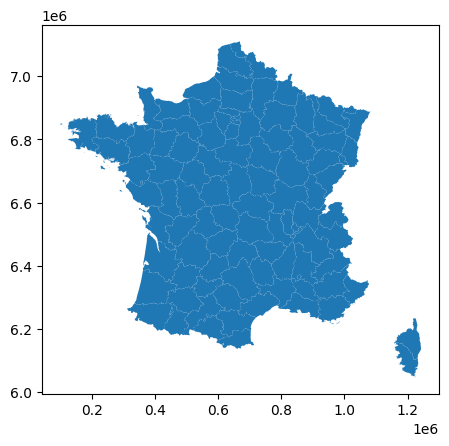

In [29]:
fig, ax = plt.subplots()
departments.plot(ax=ax)
sufosat[sufosat.isna().sum(axis=1) > 0].buffer(10000).plot(ax=ax, color="red")

For now, out of simplicity, let's just ignore these clear cuts that are outside France boundaries...


In [30]:
sufosat = sufosat.dropna(subset=["department_code_insee", "city_code_insee"]).copy()
sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
0,2024-01-01,2024-11-20,324,38,3.820016,0.000000,0.000000,38,38344,842070.343011,6.479516e+06,842064.688542,6.479522e+06,"MULTIPOLYGON (((841959.689 6479356.697, 841959..."
1,2024-01-01,2024-12-18,352,27,1.530013,0.000000,0.000000,34,34071,708160.374772,6.300274e+06,708124.688542,6.300287e+06,"MULTIPOLYGON (((708129.688 6300216.697, 708129..."
2,2024-01-01,2024-11-14,318,83,7.630021,0.000000,2.669291,07,07208,822332.080388,6.382072e+06,822379.688542,6.382047e+06,"MULTIPOLYGON (((822259.688 6381766.697, 822249..."
3,2024-01-01,2024-10-22,295,27,1.800008,0.000000,1.564782,07,07182,804851.188533,6.393810e+06,804849.688542,6.393817e+06,"MULTIPOLYGON (((804819.688 6393786.697, 804809..."
4,2024-01-01,2024-06-04,155,13,0.890005,0.000000,0.674431,81,81295,647892.328982,6.304803e+06,647889.688542,6.304802e+06,"MULTIPOLYGON (((647889.688 6304776.697, 647859..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2024-12-17,2024-12-29,12,5,0.630006,0.000000,0.000000,40,40155,358159.450460,6.321438e+06,358154.688542,6.321447e+06,"MULTIPOLYGON (((358149.689 6321376.697, 358149..."
18497,2024-12-20,2024-12-26,6,3,0.550004,0.000000,0.000000,30,30202,832141.233996,6.350730e+06,832144.688542,6.350747e+06,"MULTIPOLYGON (((832149.689 6350786.697, 832149..."
18498,2024-12-20,2024-12-25,5,4,0.520007,0.520007,0.000000,13,13035,864364.111751,6.288396e+06,864399.688542,6.288412e+06,"MULTIPOLYGON (((864319.689 6288336.697, 864319..."
18499,2024-12-20,2024-12-21,1,2,0.590004,0.590004,0.000000,30,30308,815556.383479,6.317107e+06,815564.688542,6.317112e+06,"MULTIPOLYGON (((815539.689 6317056.697, 815539..."


### Add centroïd & representation point information

The centroid is the geometric center of a shape, but it may lie outside the geometry, while the representative point is always inside the geometry and is used when you need a point guaranteed to be within the shape.


In [31]:
# TODO: This should have be done in a prior data preparation step

# I don't simply do `sufosat["centroid"] = sufosat.geometry` because `gdf.to_file()`
# doesn't support multiple geometries
sufosat["centroid_x"] = sufosat.geometry.centroid.x
sufosat["centroid_y"] = sufosat.geometry.centroid.y
sufosat["representative_point_x"] = sufosat.geometry.representative_point().x
sufosat["representative_point_y"] = sufosat.geometry.representative_point().y

## Abusive clear cuts


In [32]:
# Reorder columns
sufosat = sufosat[
    [
        "date_min",
        "date_max",
        "days_delta",
        "clear_cut_group_size",
        "area_ha",
        "natura2000_area_ha",
        "slope30_area_ha",
        "department_code_insee",
        "city_code_insee",
        "centroid_x",
        "centroid_y",
        "representative_point_x",
        "representative_point_y",
        "geometry",
    ]
]

# Sort by date
sufosat = sufosat.sort_values("date_min").reset_index(drop=True)

sufosat

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
0,2024-01-01,2024-11-20,324,38,3.820016,0.000000,0.000000,38,38344,842070.343011,6.479516e+06,842064.688542,6.479522e+06,"MULTIPOLYGON (((841959.689 6479356.697, 841959..."
1,2024-01-01,2024-12-18,352,27,1.530013,0.000000,0.000000,34,34071,708160.374772,6.300274e+06,708124.688542,6.300287e+06,"MULTIPOLYGON (((708129.688 6300216.697, 708129..."
2,2024-01-01,2024-11-14,318,83,7.630021,0.000000,2.669291,07,07208,822332.080388,6.382072e+06,822379.688542,6.382047e+06,"MULTIPOLYGON (((822259.688 6381766.697, 822249..."
3,2024-01-01,2024-10-22,295,27,1.800008,0.000000,1.564782,07,07182,804851.188533,6.393810e+06,804849.688542,6.393817e+06,"MULTIPOLYGON (((804819.688 6393786.697, 804809..."
4,2024-01-01,2024-06-04,155,13,0.890005,0.000000,0.674431,81,81295,647892.328982,6.304803e+06,647889.688542,6.304802e+06,"MULTIPOLYGON (((647889.688 6304776.697, 647859..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2024-12-17,2024-12-29,12,5,0.630006,0.000000,0.000000,40,40155,358159.450460,6.321438e+06,358154.688542,6.321447e+06,"MULTIPOLYGON (((358149.689 6321376.697, 358149..."
18497,2024-12-20,2024-12-26,6,3,0.550004,0.000000,0.000000,30,30202,832141.233996,6.350730e+06,832144.688542,6.350747e+06,"MULTIPOLYGON (((832149.689 6350786.697, 832149..."
18498,2024-12-20,2024-12-25,5,4,0.520007,0.520007,0.000000,13,13035,864364.111751,6.288396e+06,864399.688542,6.288412e+06,"MULTIPOLYGON (((864319.689 6288336.697, 864319..."
18499,2024-12-20,2024-12-21,1,2,0.590004,0.590004,0.000000,30,30308,815556.383479,6.317107e+06,815564.688542,6.317112e+06,"MULTIPOLYGON (((815539.689 6317056.697, 815539..."


In [33]:
# Abusive clear cuts with an area >= 10 hectares
sufosat[sufosat["area_ha"] >= 10]

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
22,2024-01-04,2024-08-07,216,131,11.700021,0.0,0.0,40,40184,362649.859484,6.356930e+06,362644.688542,6.356957e+06,"MULTIPOLYGON (((362539.689 6356806.697, 362539..."
24,2024-01-05,2024-09-30,269,176,16.230026,0.0,0.0,47,47221,479922.316405,6.341375e+06,479919.688542,6.341437e+06,"MULTIPOLYGON (((479789.689 6341226.697, 479789..."
42,2024-01-06,2024-11-24,323,220,18.270048,0.0,0.0,36,36199,624699.351831,6.654219e+06,624599.688542,6.654107e+06,"MULTIPOLYGON (((624309.688 6653706.697, 624309..."
51,2024-01-06,2024-09-19,257,133,10.200043,0.0,0.0,49,49333,446023.727998,6.730534e+06,445884.688542,6.730542e+06,"MULTIPOLYGON (((446299.688 6730616.697, 446299..."
133,2024-01-10,2024-08-13,216,156,12.160039,0.0,0.0,72,72357,476761.160466,6.735711e+06,476879.688542,6.735702e+06,"MULTIPOLYGON (((476509.689 6735546.697, 476509..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,2024-07-09,2024-11-17,131,57,13.700029,0.0,0.0,47,47039,463499.666540,6.341884e+06,463579.688542,6.341842e+06,"MULTIPOLYGON (((463429.689 6341816.697, 463429..."
15211,2024-07-09,2024-12-24,168,75,12.970029,0.0,0.0,40,40158,452699.715544,6.343227e+06,452674.688542,6.343147e+06,"MULTIPOLYGON (((452619.689 6342836.697, 452619..."
15563,2024-07-13,2024-10-24,103,60,11.420020,0.0,0.0,33,33300,387722.289212,6.467852e+06,387729.688542,6.467837e+06,"MULTIPOLYGON (((387499.689 6467796.697, 387499..."
15838,2024-07-17,2024-11-03,109,79,11.190027,0.0,0.0,38,38463,885521.274807,6.458223e+06,885504.688542,6.458172e+06,"MULTIPOLYGON (((885469.689 6457946.697, 885469..."


In [34]:
# Abusive clear cuts within a Natura2000 area
(
    len(sufosat[sufosat["natura2000_area_ha"] >= 0.5]),
    len(sufosat[sufosat["natura2000_area_ha"] >= 1]),
    len(sufosat[sufosat["natura2000_area_ha"] >= 2]),
)

(2027, 992, 379)

In [35]:
# Abusive clear cuts with a slope >= 30%
(
    len(sufosat[sufosat["slope30_area_ha"] >= 0.5]),
    len(sufosat[sufosat["slope30_area_ha"] >= 1]),
    len(sufosat[sufosat["slope30_area_ha"] >= 2]),
)

(1210, 527, 161)

In [36]:
# Abusive clear cuts with all criterias
abusive_clear_cuts: gpd.GeoDataFrame = sufosat[
    (sufosat["area_ha"] >= 10)
    | (sufosat["natura2000_area_ha"] >= 2)
    | (sufosat["slope30_area_ha"] >= 2)
]
abusive_clear_cuts

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
2,2024-01-01,2024-11-14,318,83,7.630021,0.000000,2.669291,07,07208,822332.080388,6.382072e+06,822379.688542,6.382047e+06,"MULTIPOLYGON (((822259.688 6381766.697, 822249..."
22,2024-01-04,2024-08-07,216,131,11.700021,0.000000,0.000000,40,40184,362649.859484,6.356930e+06,362644.688542,6.356957e+06,"MULTIPOLYGON (((362539.689 6356806.697, 362539..."
24,2024-01-05,2024-09-30,269,176,16.230026,0.000000,0.000000,47,47221,479922.316405,6.341375e+06,479919.688542,6.341437e+06,"MULTIPOLYGON (((479789.689 6341226.697, 479789..."
27,2024-01-05,2024-10-20,289,86,6.370024,0.000000,4.054569,34,34086,673420.010470,6.263867e+06,673339.688542,6.263902e+06,"MULTIPOLYGON (((673329.689 6263796.697, 673329..."
42,2024-01-06,2024-11-24,323,220,18.270048,0.000000,0.000000,36,36199,624699.351831,6.654219e+06,624599.688542,6.654107e+06,"MULTIPOLYGON (((624309.688 6653706.697, 624309..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17783,2024-09-16,2024-10-15,29,25,2.580018,2.580018,0.059584,43,43211,789438.603323,6.457949e+06,789404.688542,6.457942e+06,"MULTIPOLYGON (((789459.689 6457856.697, 789469..."
18061,2024-10-02,2024-11-03,32,27,3.200017,3.200017,0.000000,39,39149,910618.969825,6.666181e+06,910654.688542,6.666187e+06,"MULTIPOLYGON (((910749.688 6666196.697, 910749..."
18070,2024-10-03,2024-12-26,84,23,2.010012,2.010012,1.906620,13,13100,849831.504472,6.297739e+06,849844.688542,6.297742e+06,"MULTIPOLYGON (((849749.689 6297706.697, 849749..."
18337,2024-10-21,2024-11-03,13,11,2.980014,2.980014,0.000000,01,01208,915943.178457,6.525725e+06,915904.688542,6.525717e+06,"MULTIPOLYGON (((915829.689 6525566.697, 915829..."


## Save the result to S3

We leave the criterias filtering up to the consumers of the file


In [37]:
# Save the result to disk
# index=False because we don't need to keep the group id
Path("../data/abusive_clear_cuts/").mkdir(exist_ok=True, parents=True)
sufosat.to_file("../data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb", index=False)

In [38]:
!aws s3 cp ../data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb s3://brigade-coupe-rase-s3/analytics/data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb --profile d4g-s13-brigade-coupes-rases

upload: ../data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb to s3://brigade-coupe-rase-s3/analytics/data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb


In [39]:
!aws s3 ls s3://brigade-coupe-rase-s3/analytics/ --recursive --profile d4g-s13-brigade-coupes-rases

2025-02-25 09:31:33   96946219 analytics/data
2025-03-02 19:58:22  114393184 analytics/data/abusive_clear_cuts/abusive_clear_cuts_2024.fgb
2025-03-16 21:48:59  139833560 analytics/data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb
2025-03-02 18:53:00  517567704 analytics/data/cadastre/cadastre_france_cities.fgb
2025-03-02 18:53:03   28085888 analytics/data/cadastre/cadastre_france_departments.fgb
2025-02-21 18:43:11  558882864 analytics/data/ign/bdalti25/slope_gte_30.fgb
2025-02-21 18:42:55   32993275 analytics/data/ign/bdalti25/slope_gte_30.tif
2025-02-25 09:58:17   96946219 analytics/data/sufosat/mosaics_tropisco_warnings_france_date.tif
2025-02-25 10:08:57   76601154 analytics/data/sufosat/mosaics_tropisco_warnings_france_prob.tif
2025-02-21 13:26:51  120737768 analytics/data/sufosat/sufosat_clear_cuts_2024.fgb
2025-03-16 20:51:40 1925723784 analytics/data/sufosat/sufosat_clear_cuts_v3.fgb
